In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize","arrow")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [2]:
# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()

    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }

    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }

    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")



Git root directory: /home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline 


In [3]:
figures_path <- file.path("../figures/mAP")
if (!dir.exists(figures_path)) {
  dir.create(figures_path, recursive = TRUE)
}

In [4]:
organoid_fs_intra_patient_mAP_file <- file.path(
    root_dir,
    "5.EDA/results/mAP/organoid_fs_intra_patient_mAP.parquet"
)
organoid_fs_inter_patient_mAP_file <- file.path(
    root_dir,
    "5.EDA/results/mAP/sc_fs_inter_patient_mAP.parquet"
)
sc_fs_intra_patient_mAP_file <- file.path(
    root_dir,
    "5.EDA/results/mAP/sc_fs_intra_patient_mAP.parquet"
)
sc_fs_inter_patient_mAP_file <- file.path(
    root_dir,
    "5.EDA/results/mAP/sc_fs_inter_patient_mAP.parquet"
)
organoid_fs_intra_patient_mAP_df <- arrow::read_parquet(
    organoid_fs_intra_patient_mAP_file
)
organoid_fs_inter_patient_mAP_df <- arrow::read_parquet(
    organoid_fs_inter_patient_mAP_file
)
sc_fs_intra_patient_mAP_df <- arrow::read_parquet(
    sc_fs_intra_patient_mAP_file
)
sc_fs_inter_patient_mAP_df <- arrow::read_parquet(
    sc_fs_inter_patient_mAP_file
)

# plot paths
organoid_fs_intra_patient_mAP_plot_path <- file.path(
    figures_path,
    "organoid_fs_intra_patient_mAP.png"
)
organoid_fs_inter_patient_mAP_plot_path <- file.path(
    figures_path,
    "organoid_fs_inter_patient_mAP.png"
)
sc_fs_intra_patient_mAP_plot_path <- file.path(
    figures_path,
    "sc_fs_intra_patient_mAP.png"
)
sc_fs_inter_patient_mAP_plot_path <- file.path(
    figures_path,
    "sc_fs_inter_patient_mAP.png"
)


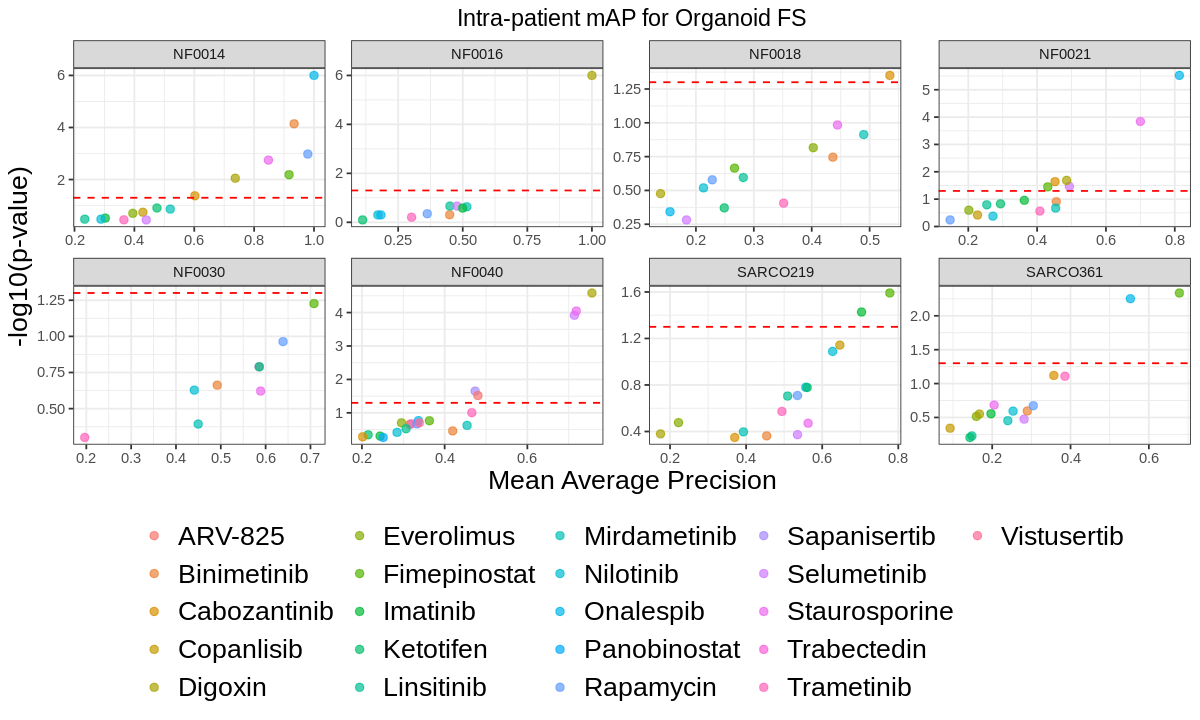

In [5]:
width <- 10
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
organoid_intra_plot <- (
    ggplot(data = organoid_fs_intra_patient_mAP_df,
    aes(
        x = mean_average_precision,
        y = `-log10(p-value)`,
        color = treatment
    )) 
    + geom_point(size = 2, alpha = 0.7)
    + labs(
        x = "Mean Average Precision",
        y = "-log10(p-value)",
        title = "Intra-patient mAP for Organoid FS"
    )
    + geom_hline(yintercept = 1.3, linetype = "dashed", color = "red")  # Adjust threshold as needed
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
    + facet_wrap(~patient, ncol = 4, scales = "free")
)
ggsave(
    filename = organoid_fs_intra_patient_mAP_plot_path,
    plot = organoid_intra_plot,
    width = width,
    height = height,
    dpi = 600
)
organoid_intra_plot

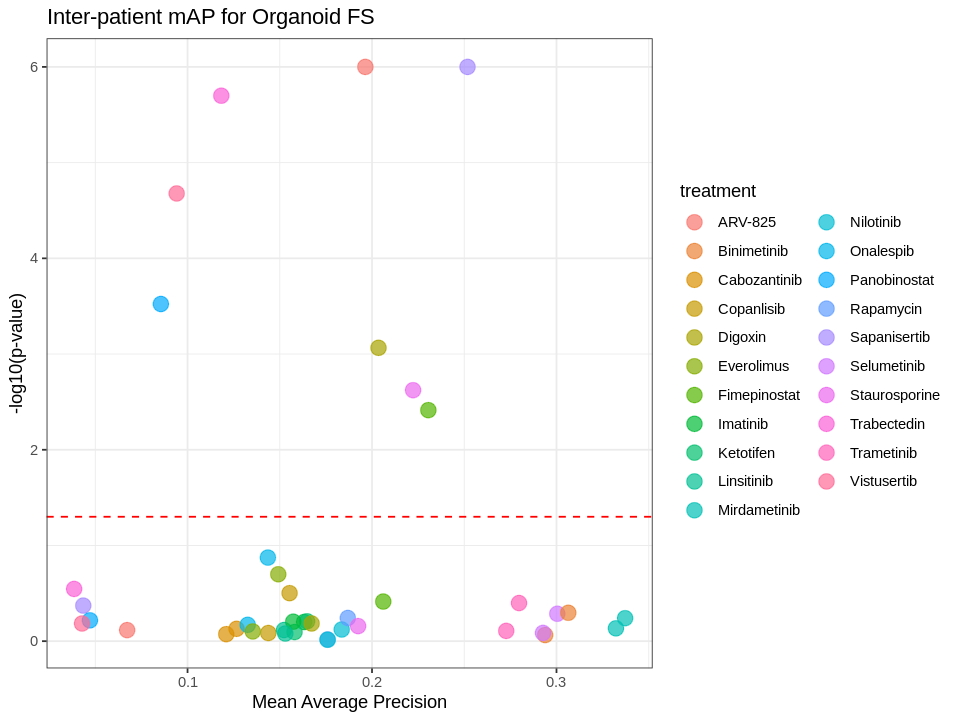

In [6]:
width <- 8
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
organoid_inter_plot <- (
    ggplot(data = organoid_fs_inter_patient_mAP_df,
    aes(
        x = mean_average_precision,
        y = `-log10(p-value)`,
        color = treatment
    )) 
    + geom_point(size = 4, alpha = 0.7)
    + labs(
        x = "Mean Average Precision",
        y = "-log10(p-value)",
        title = "Inter-patient mAP for Organoid FS"
    )
    + geom_hline(yintercept = 1.3, linetype = "dashed", color = "red")  # Adjust threshold as needed
    + theme_bw()
)
ggsave(
    filename = organoid_fs_inter_patient_mAP_plot_path,
    plot = organoid_inter_plot,
    width = width,
    height = height,
    dpi = 600
)
organoid_inter_plot

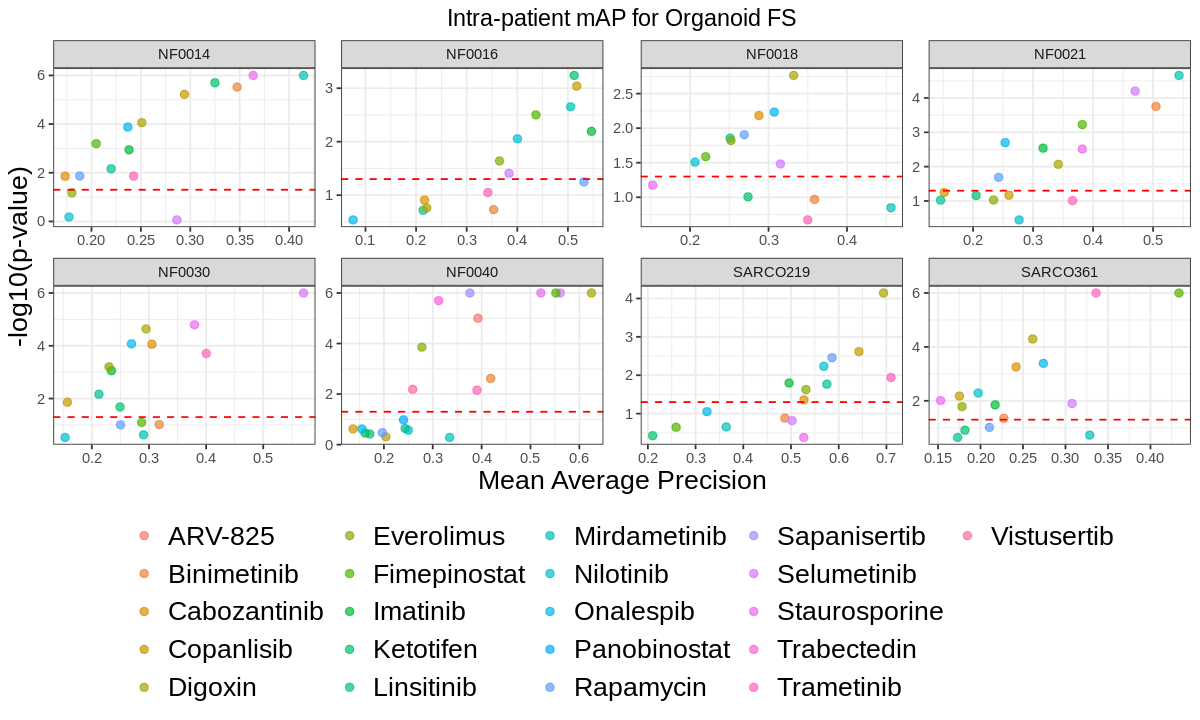

In [7]:
width <- 10
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
sc_intra_plot <- (
    ggplot(data = sc_fs_intra_patient_mAP_df,
    aes(
        x = mean_average_precision,
        y = `-log10(p-value)`,
        color = treatment
    )) 
    + geom_point(size = 2, alpha = 0.7)
    + labs(
        x = "Mean Average Precision",
        y = "-log10(p-value)",
        title = "Intra-patient mAP for Organoid FS"
    )
    + geom_hline(yintercept = 1.3, linetype = "dashed", color = "red")  # Adjust threshold as needed
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom",
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
    + facet_wrap(~patient, ncol = 4, scales = "free")
)
ggsave(
    filename = sc_fs_intra_patient_mAP_plot_path,
    plot = sc_intra_plot,
    width = width,
    height = height,
    dpi = 600
)
sc_intra_plot

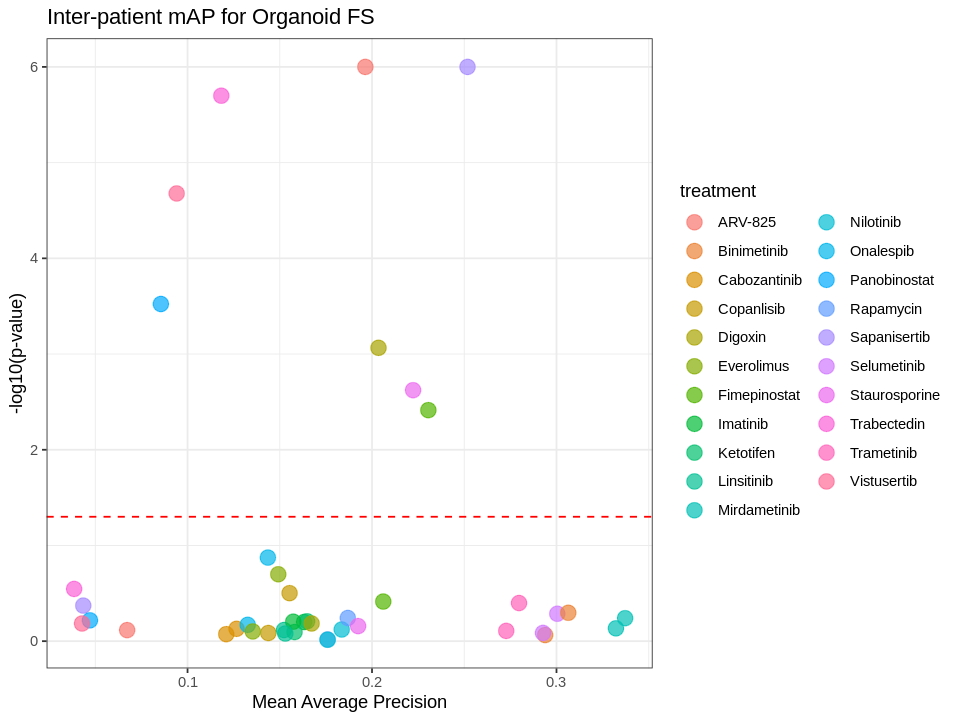

In [8]:
width <- 8
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
sc_inter_plot <- (
    ggplot(data = sc_fs_inter_patient_mAP_df,
    aes(
        x = mean_average_precision,
        y = `-log10(p-value)`,
        color = treatment
    )) 
    + geom_point(size = 4, alpha = 0.7)
    + labs(
        x = "Mean Average Precision",
        y = "-log10(p-value)",
        title = "Inter-patient mAP for Organoid FS"
    )
    + geom_hline(yintercept = 1.3, linetype = "dashed", color = "red")  # Adjust threshold as needed
    + theme_bw()
)
ggsave(
    filename = sc_fs_inter_patient_mAP_plot_path,
    plot = sc_inter_plot,
    width = width,
    height = height,
    dpi = 600
)
sc_inter_plot

In [22]:
file_path <- file.path(
    root_dir,
    "5.EDA/results/distance_metrics/organoid_consensus_inter_patient_distance_metrics.parquet"
)
organoid_consensus_inter_patient_distance_metrics_df <- arrow::read_parquet(
    file_path
)

head(organoid_consensus_inter_patient_distance_metrics_df)

treatment,euclidean_distance_mean,euclidean_distance_std,cosine_distance_mean,cosine_distance_std,correlation_distance_mean,correlation_distance_std
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Binimetinib,8.582487,2.525853,0.8142327,0.1600712,0.8221130,0.1647275
Cabozantinib,8.148341,2.549673,0.7307151,0.1279112,0.7618539,0.1299391
Copanlisib,9.799976,5.430951,0.8071936,0.1891515,0.8406518,0.1606562
Digoxin,13.721736,8.237018,0.8608902,0.1722862,0.9086338,0.1714707
Everolimus,7.839624,1.423526,0.7801374,0.1387865,0.8006834,0.1542013
Fimepinostat,11.813013,7.283583,0.8994737,0.1510179,0.9335978,0.1545432


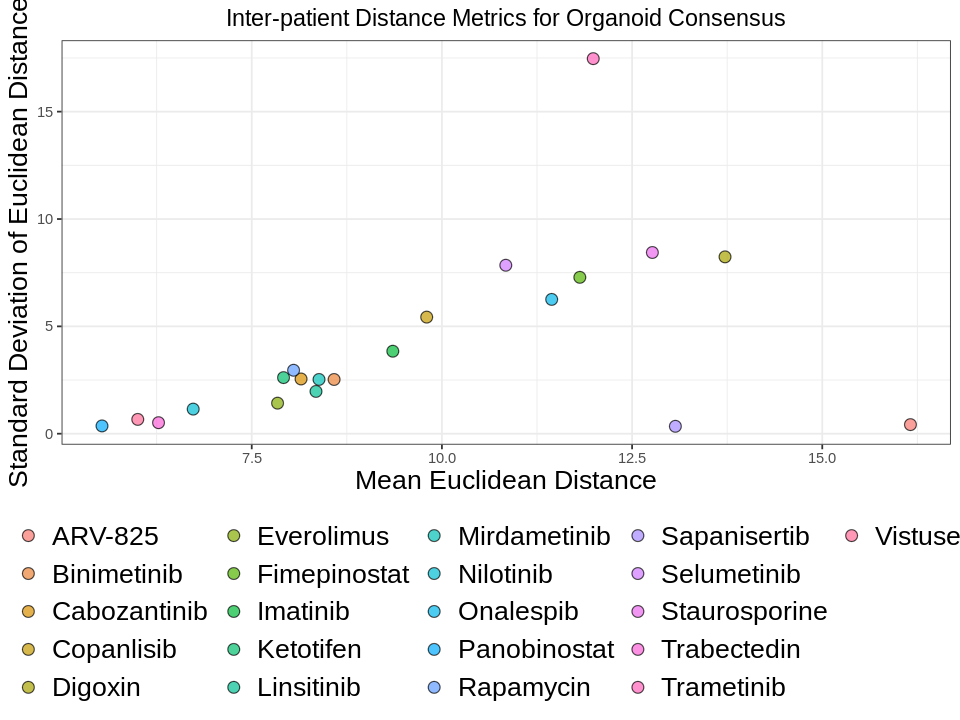

In [23]:
plot <- (ggplot(
    data = organoid_consensus_inter_patient_distance_metrics_df,
    aes(x = euclidean_distance_mean, y = euclidean_distance_std, fill = treatment)
)
    + geom_point(size = 3, shape = 21, alpha = 0.7)
    + labs(
        x = "Mean Euclidean Distance",
        y = "Standard Deviation of Euclidean Distance",
        title = "Inter-patient Distance Metrics for Organoid Consensus"
    )
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "bottom", 
        legend.title = element_blank(),
        legend.text = element_text(size = 16)
    )
    # + facet_wrap(~patient, ncol = 4, scales = "free")
)
plot